<a href="https://colab.research.google.com/github/KumaranShivam5/improved-succotash/blob/master/assignment2/ML_assign2_q4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:red;font-family:monospace;">Parzen window for IRIS data<h1> 

# importig dependencies

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
raw_data=pd.read_csv('iris.txt',sep=',')

Reading data

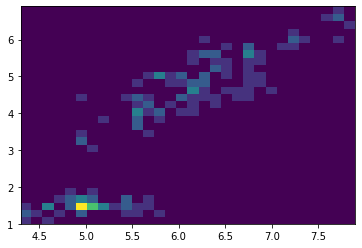

In [0]:
no_of_ctg=3
raw_data.describe().loc[:,:].pw
plt.hist2d(raw_data.loc[:,'pl'],raw_data.loc[:,'sl'], bins=30)
plt.show()

In [0]:
#defining covarience matrix for gaussian window for each class 
#the covarience matrix is assumed to be diagonal
#with the variences as the diagonal entries
cov=[]

for i in range(1,4):
    cov_temp=[]
    for j in range(4):
        cov_temp.append(np.square(raw_data[raw_data['ctg']==i].describe().loc['std'].iloc[j]))
    cov.append(cov_temp)
print(cov)
cov_matrix=[]
det=[]
for i in range(3):
    cov_matrix.append(np.diag(cov[i]))
    det.append(np.linalg.det(cov_matrix[i]))
print(cov_matrix[0])
print(det)

# Result
# this cov_matrix in a list containing three 4x4 matrices
# the matrices are covarience matrieces corresponding to
# different classes

[[0.12424897959183666, 0.1451795918367347, 0.030106122448979606, 0.011493877551020404], [0.26643265306122454, 0.09846938775510206, 0.2208163265306124, 0.039106122448979576], [0.40434285714285706, 0.10400408163265312, 0.304587755102041, 0.07543265306122446]]
[[0.12424898 0.         0.         0.        ]
 [0.         0.14517959 0.         0.        ]
 [0.         0.         0.03010612 0.        ]
 [0.         0.         0.         0.01149388]]
[6.241942901180606e-06, 0.00022655029059295565, 0.0009662110094973292]


# Window Function


Function 


```
# estimate_pdf(x,data,N,h)
```
will be used to estimate the likelihood 
-- p(x|category) (the pdf),
 where 
x is the point in D dim space , 
data is the training data belonging to this category , N is the number of training data samples belonging to this category and
h is bandwidth' or window width.



In [0]:

def estimate_pdf(x,data,h=1):
    N=len(data_ctg1)
    x=np.asarray(x)
    sum_arr=0
    for xn in data:
        sum_arr+=(gauss_window((x-xn)/h))
    res=sum_arr/(N*(h**len(x)))
    return(sum_arr)

def gauss_window(x):
    x=np.asarray(x)
    D=len(x)
    p1=np.power(2*np.pi, -(D/2))
    p2= (-1/2)*(np.dot(x,x))
    res=p1*np.exp(p2)
    return(res)

In [0]:
raw_data_to_split=raw_data.sample(frac=1)
split=0.8
split_no=int(split*len(raw_data_to_split))
train_data=raw_data_to_split.iloc[:split_no]
test_data=raw_data_to_split.iloc[split_no:]
data_ctg=[]
for i in range(no_of_ctg):
    data_ctg.append(train_data[train_data['ctg']==i+1].iloc[:,:4].to_numpy())

Running accuracy test

In [0]:
h=10
test_data_arr=test_data.to_numpy()[:,:4]
test_label_arr=test_data.to_numpy()[:,4:]
ctr=0
for i in range(len(test_data_arr)):
    p=[]
    for j in range(no_of_ctg):
        p.append(estimate_pdf(test_data_arr[i],data_ctg[j],h))
        #print(p)
    if(np.argmax(p)+1==int(test_label_arr[i])):
        ctr+=1
print(ctr/len(test_data_arr))
    

0.5
